# Objective : Movie Review Classification - NLP  (RNN)


# Classification (Using the DL)

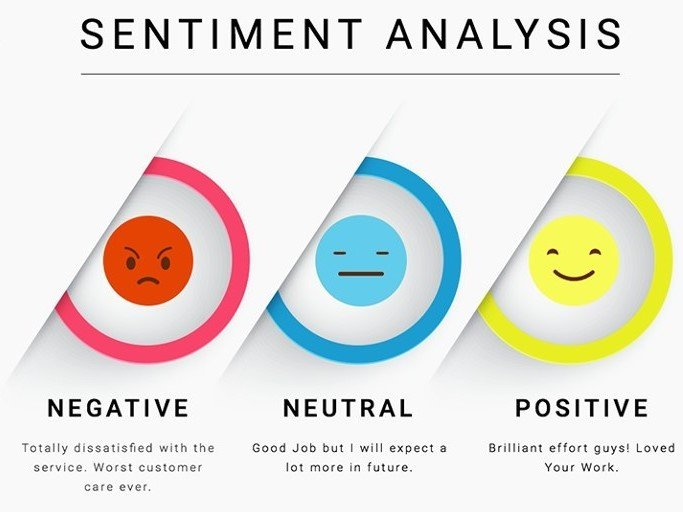

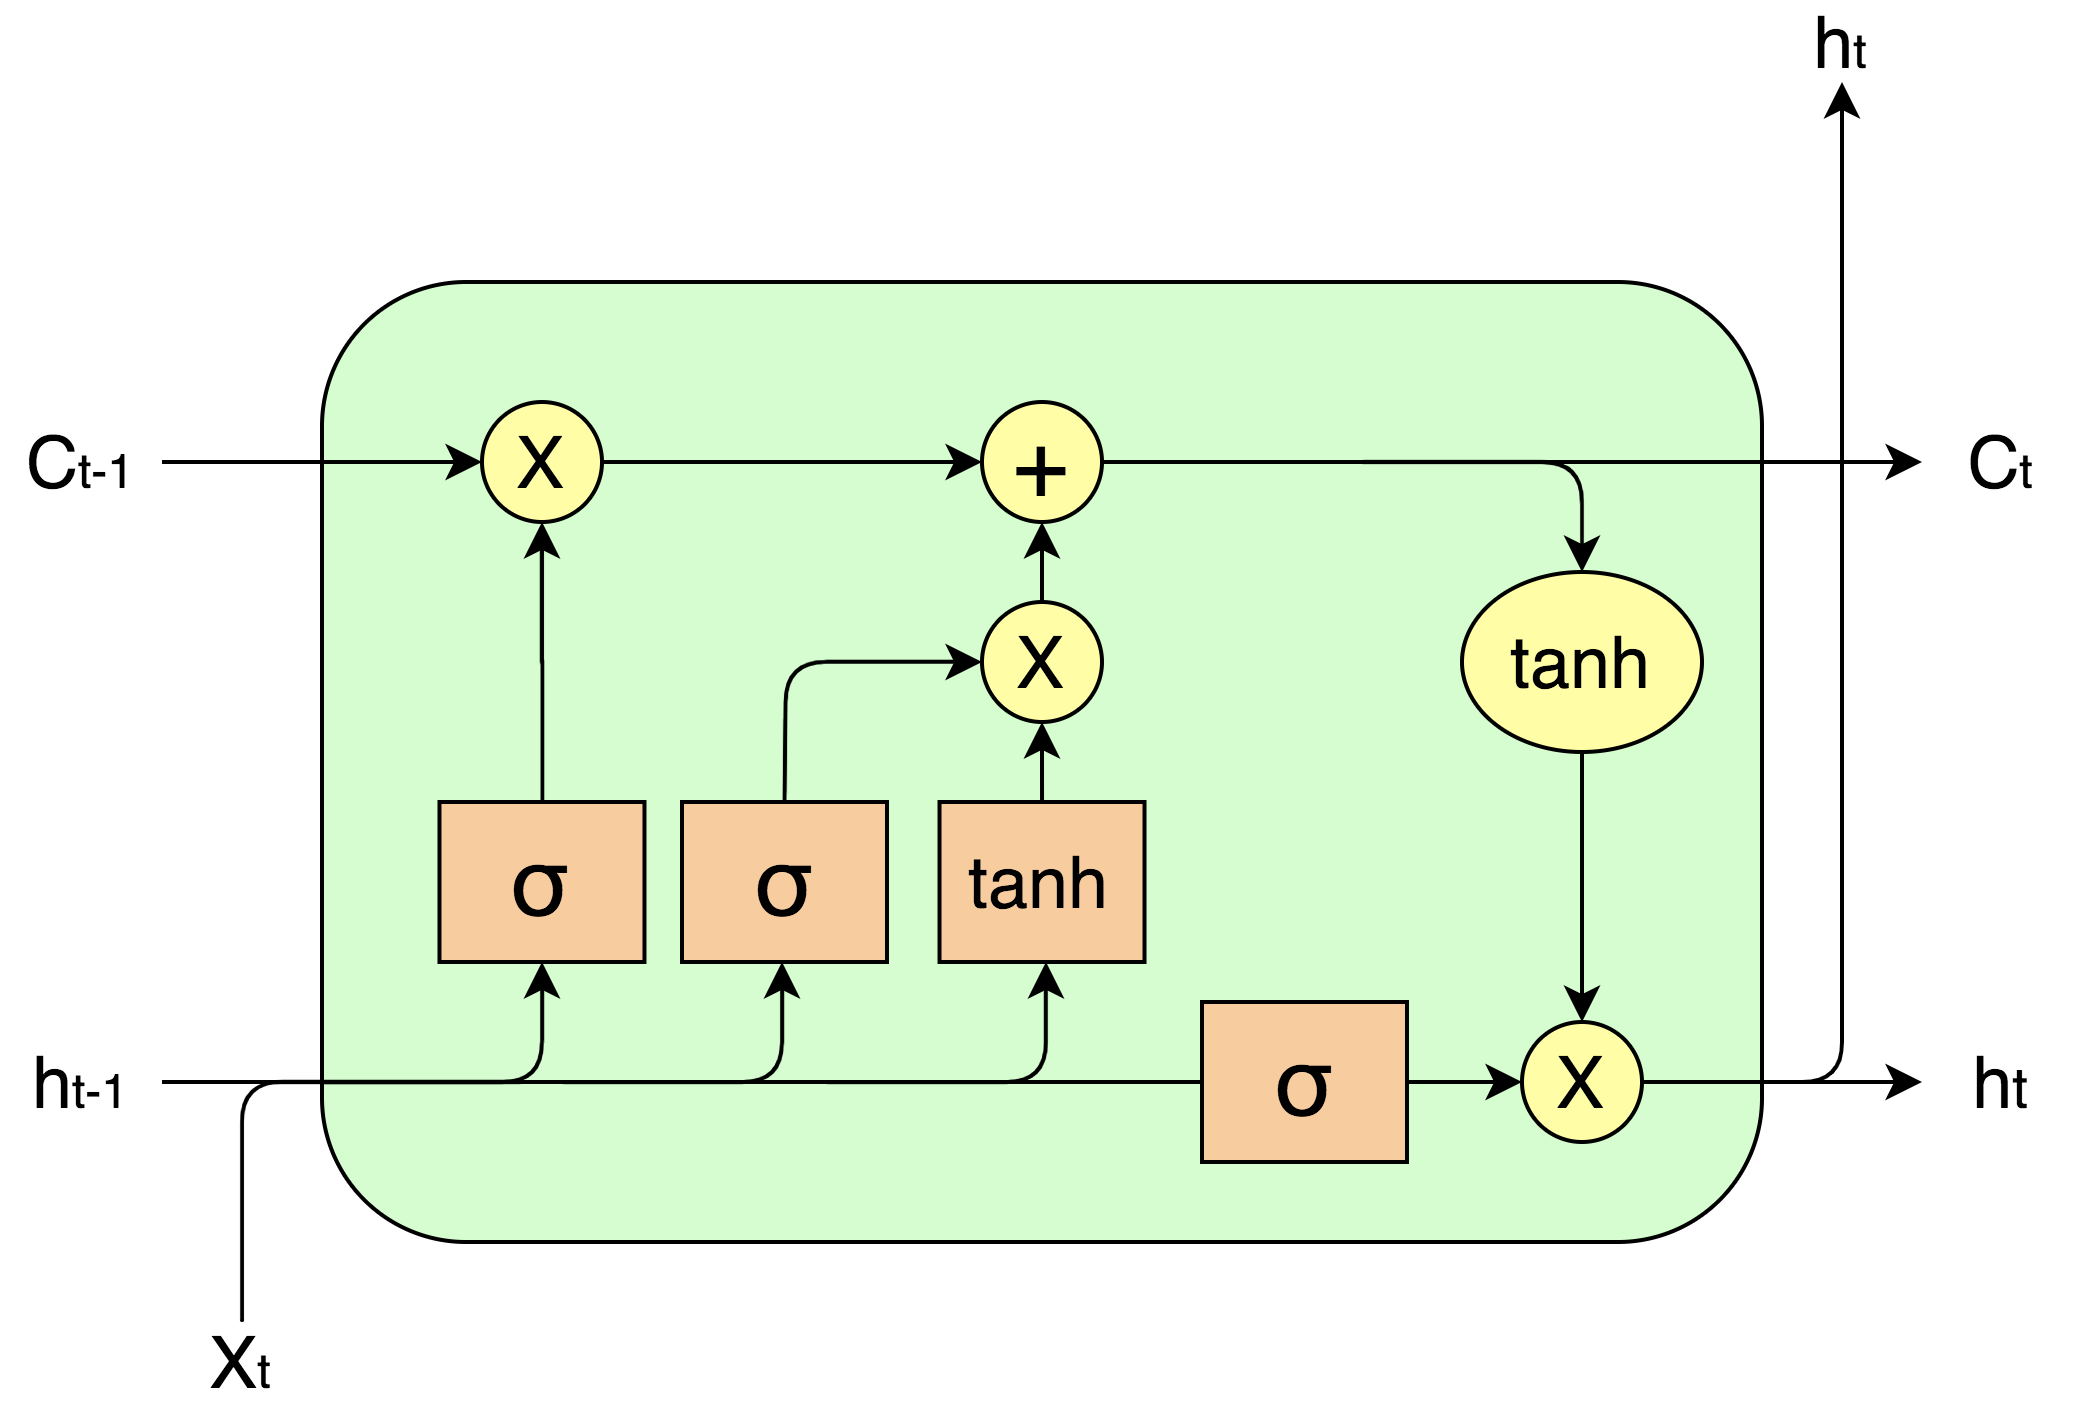

# 1. Load Python Modules

In [65]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2. Read the Dataset from CSV file  - Using Pandas

### **About Data: IMDB Dataset**

Credits: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download


- This data consists of two columns.
        - review
        - sentiment
- Reviews are the statements given by users after watching the movie.
- sentiment feature tells whether the given review is positive or negative.

In [53]:
#1. read the data provided in the same directory with name 'movies_sentiment_data.csv' and store it in df variable
movies_df=pd.read_csv("IMDB Dataset.csv")

#2. print the shape of the data
print(movies_df.shape)

#3. print top 5 datapoints
print(movies_df.head(5))


(50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [54]:
#creating a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative
movies_df["Category"]=movies_df["sentiment"].apply(lambda x: 1 if x=='positive' else 0)

In [55]:
#check the distribution of 'Category' and see whether the Target labels are balanced or not.

movies_df["Category"].value_counts()

1    25000
0    25000
Name: Category, dtype: int64

In [56]:
import re
import nltk
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def process(text):
    text=text.strip()
    text=re.sub("<[^>]*>", " ",text)
    text=re.sub("[^a-zA-Z]"," ",text)
    text=text.lower()
    text=text.split()
    text = [ ps.stem(word) for word in text]
    return " ".join(text)
    

In [57]:
movies_df["processed_review"]=movies_df["review"].apply(process)

In [58]:
print(movies_df.head(5))

                                              review sentiment  Category  \
0  One of the other reviewers has mentioned that ...  positive         1   
1  A wonderful little production. <br /><br />The...  positive         1   
2  I thought this was a wonderful way to spend ti...  positive         1   
3  Basically there's a family where a little boy ...  negative         0   
4  Petter Mattei's "Love in the Time of Money" is...  positive         1   

                                    processed_review  
0  one of the other review ha mention that after ...  
1  a wonder littl product the film techniqu is ve...  
2  i thought thi wa a wonder way to spend time on...  
3  basic there s a famili where a littl boy jake ...  
4  petter mattei s love in the time of money is a...  


# 3. Train test split

In [59]:
X_train,X_test,y_train,y_test=train_test_split(movies_df['processed_review'],movies_df["Category"],test_size=0.2,random_state=42)

In [60]:
print(X_train.shape)
print(X_test.shape)

(40000,)
(10000,)


# 4. Tokenization

In [66]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

# Padding sequences
max_length = max(len(seq) for seq in sequences)

print("max sequence length:", max(len(s) for s in sequences))
print("min sequence length:", min(len(s) for s in sequences))

s = sorted(len(s) for s in sequences)
print("median sequence length:", s[len(s) // 2])

max_length =175

X_train_tokens = pad_sequences(sequences, maxlen=max_length,padding='post')
print('Shape of X_train_tokens tensor:', X_train_tokens.shape)

word2idx = tokenizer.word_index
print("Found  unique tokens.",len(word2idx))


sequences = tokenizer.texts_to_sequences(X_test)
# Padding sequences
X_test_tokens = pad_sequences(sequences, maxlen=max_length,padding='post')
print('Shape of X_test_tokens tensor:', X_test_tokens.shape)

max sequence length: 2494
min sequence length: 6
median sequence length: 175
Shape of X_train_tokens tensor: (40000, 175)
Found  unique tokens. 62816
Shape of X_test_tokens tensor: (10000, 175)


# 5.Build the RNN Model

In [62]:
MAX_SEQUENCE_LENGTH = max_length
MAX_VOCAB_SIZE = len(word2idx)+1
EMBEDDING_DIM = 32
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32
EPOCHS = 20

In [67]:
model = Sequential()
model.add(Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(100)),
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 175, 32)           2010144   
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2063445 (7.87 MB)
Trainable params: 2063445 (7.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_tokens, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,validation_split=VALIDATION_SPLIT)

Epoch 1/20
1000/1000 [==============================] - 63s 62ms/step - loss: 0.6535 - accuracy: 0.6043 - val_loss: 0.6981 - val_accuracy: 0.5311
Epoch 2/20
1000/1000 [==============================] - 61s 61ms/step - loss: 0.5522 - accuracy: 0.7300 - val_loss: 0.5242 - val_accuracy: 0.7551
Epoch 3/20
1000/1000 [==============================] - 59s 59ms/step - loss: 0.4580 - accuracy: 0.8078 - val_loss: 0.5341 - val_accuracy: 0.7461
Epoch 4/20
1000/1000 [==============================] - 59s 59ms/step - loss: 0.4379 - accuracy: 0.8210 - val_loss: 0.5420 - val_accuracy: 0.7501
Epoch 5/20
1000/1000 [==============================] - 60s 60ms/step - loss: 0.4727 - accuracy: 0.7923 - val_loss: 0.6126 - val_accuracy: 0.6185
Epoch 6/20
1000/1000 [==============================] - 57s 57ms/step - loss: 0.3245 - accuracy: 0.8686 - val_loss: 0.3414 - val_accuracy: 0.8580
Epoch 7/20
1000/1000 [==============================] - 57s 57ms/step - loss: 0.2066 - accuracy: 0.9233 - val_loss: 0.3400 -

# 6. Performance Evaluation

In [69]:
y_pred = model.predict(X_test_tokens)
# Convert the probabilities to class labels (0 or 1)
y_pred_class = (y_pred > 0.5).astype(int)

313/313 [==============================] - 4s 13ms/step


In [70]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      5206
           1       0.83      0.88      0.85      4794

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

[[4367  839]
 [ 594 4200]]


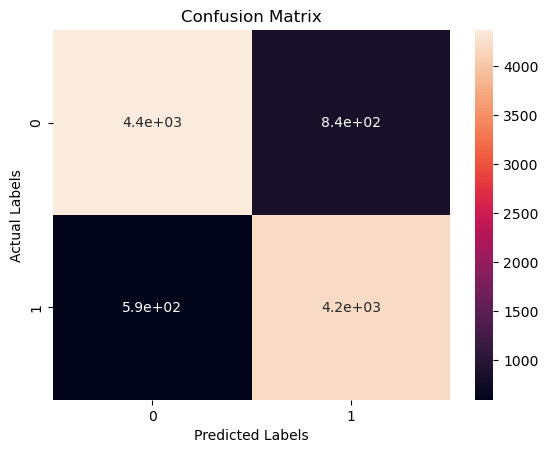

In [71]:
# print the classfication report
print(classification_report(y_pred_class,y_test))

print(confusion_matrix(y_pred_class,y_test))
conf_matrix = confusion_matrix(y_pred_class,y_test)
draw_heatmap(conf_matrix)

# 7. Save the Model

In [72]:
model.save("movie_review_model.h5")
model.save("movie_review_model.keras")

C:\Users\91956\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [73]:
import pickle

# Assuming tokenizer is your Tokenizer instance
with open('movie_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)